Chapter 7
# 移动相关性系数
Book_6《数据有道》 | 鸢尾花书：从加减乘除到机器学习

In [14]:
# !pip install yfinance

In [18]:
# initializations and download results 
import pandas as pd
import pandas_datareader as web
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
# import pandas_datareader as pdr
import yfinance as yf

In [23]:
tickers = ['^GSPC','TSLA']

from datetime import datetime
startdate = datetime(2015,8,1)
enddate = datetime(2021,8,1)
data = yf.download(tickers = tickers,
                  start = startdate,
                  end = enddate)

[*********************100%%**********************]  2 of 2 completed


In [32]:
data.to_pickle('data.pkl')
# data_ = pd.read_pickle('data.pkl')

In [26]:
df = data['Adj Close']
df

,TSLA,^GSPC
Date,,
2015-08-03,17.332666,2098.040039
2015-08-04,17.752001,2093.320068
2015-08-05,18.008667,2099.840088
2015-08-06,16.408667,2083.560059
2015-08-07,16.167334,2077.570068
...,...,...
2021-07-26,219.206665,4422.299805
2021-07-27,214.926666,4401.459961
2021-07-28,215.660004,4400.640137


In [28]:
#%% daily log return

daily_log_r = df.apply(lambda x: np.log(x) - np.log(x.shift(1)))
daily_log_r = daily_log_r.dropna()

df_corr = daily_log_r['^GSPC'].rolling(100).corr(daily_log_r['TSLA'])

Text(0, 0.5, 'Rolling correlation')

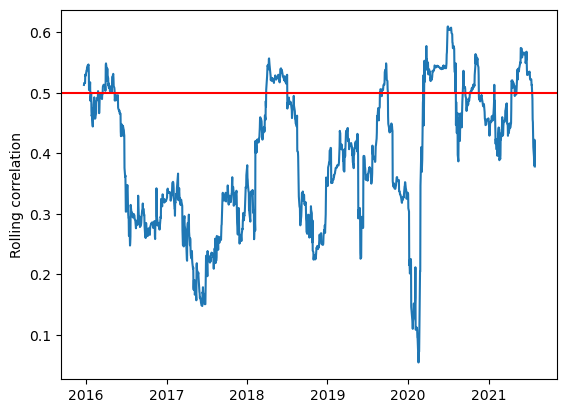

In [29]:
fig, ax = plt.subplots()

# daily return of selected date range
ax.plot(df_corr[df_corr.first_valid_index():df_corr.index[-1]])
ax.axhline(y=0.5, color='r', linestyle='-')
ax.set_ylabel('Rolling correlation')